In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler

Датасет - https://www.kaggle.com/harlfoxem/housesalesprediction

In [10]:
df = pd.read_csv('kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id - уникальный идентификатор для каждого проданного дома <br>
date - дата продажи дома <br>
price - Цена каждого проданного дома <br>
bedrooms - Количество спален<br>
bathrooms - Количество ванных комнат<br>
sqft_living - метраж внутренней жилой площади дома<br>
sqft_lot - метраж земельного участка<br>
floors - Количество этажей<br>
waterfront - выходит ли квартира на набережную<br>
view - оценка вида<br>
condition - оценка состояния дома<br>
grade - оценка качества строительства и проектирования<br>
sqft_above - метраж внутренней жилой площади дома над землёй<br>
sqft_basement - метраж внутренней жилой площади дома под землей<br>
yr_built - год постройки дома<br>
yr_renovated - год реновации дома<br>
zipcode - почтовый индекс<br>
lat - широта<br>
long - долгота<br>
sqft_living15 - жилой площадь внутри домов ближайших 15 соседей<br>
sqft_lot15 - площадь земельных участков ближайших 15 соседей<br>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
def missing_values_table(df):
        miss = df.isnull().sum()
        percent = miss/len(df)*100
        miss_df = pd.concat([miss, percent], axis=1)
        miss_df = miss_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return miss_df

In [14]:
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


In [15]:
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df = df.drop(['date', 'yr_built', 'yr_renovated', 'id', 'sqft_basement'], 1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,98028,47.7379,-122.233,2720,8062,82


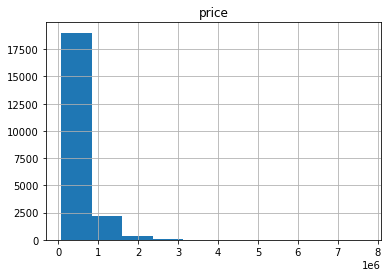

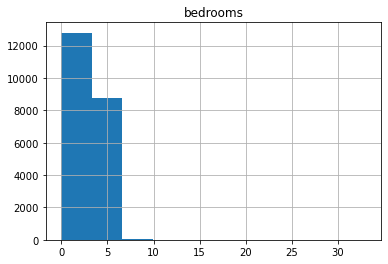

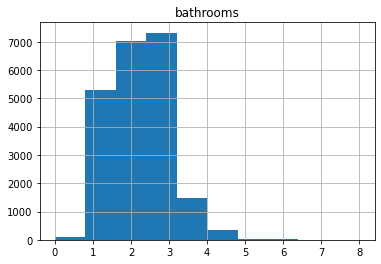

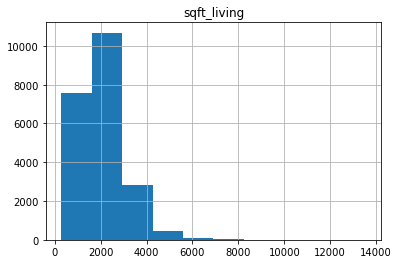

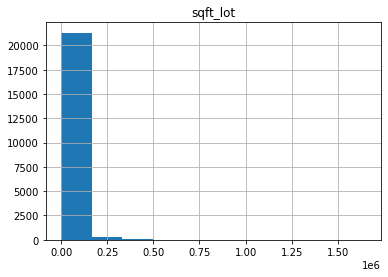

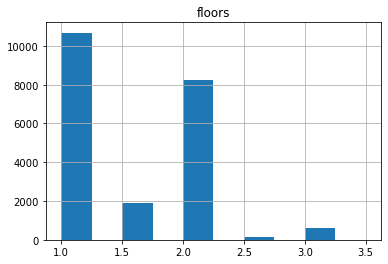

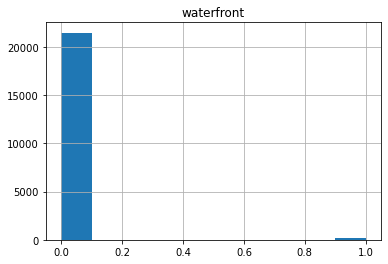

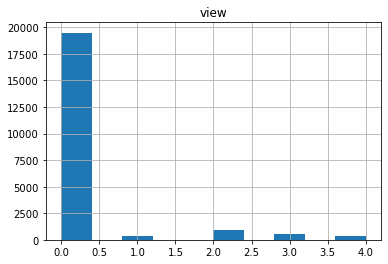

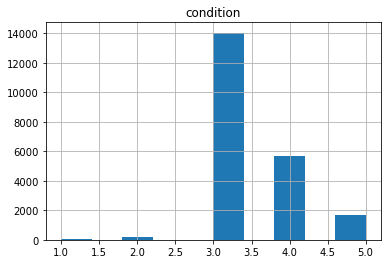

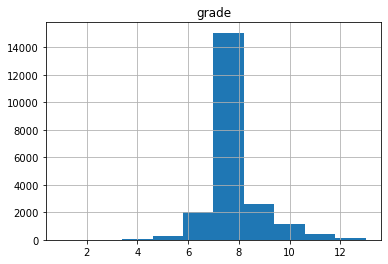

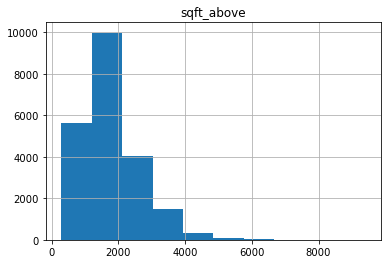

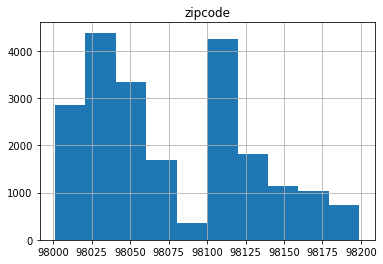

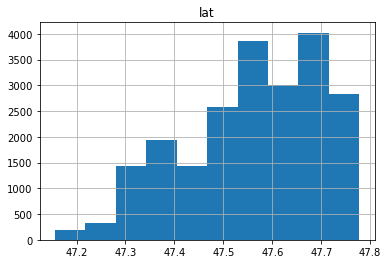

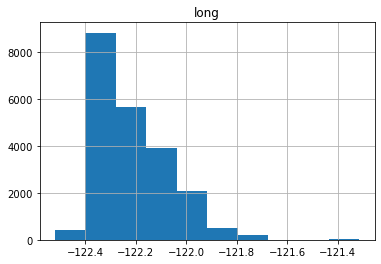

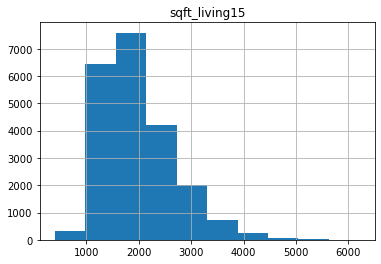

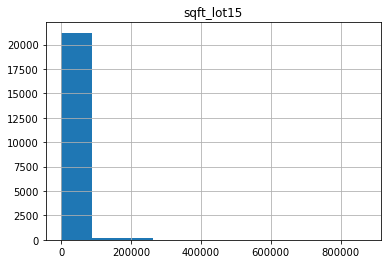

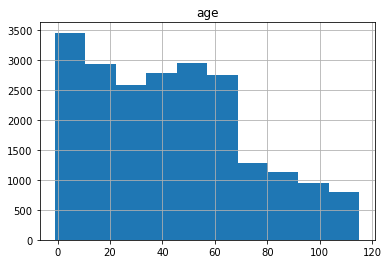

In [16]:
for  feature in (df.columns):
    df.hist(feature)   

In [17]:
df_q =  df.quantile([0.0001, 0.9999])

In [18]:
for feature in ['bedrooms', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']:
    df = df.drop(df[(df[feature]>df_q.iloc[1][feature]) | (df[feature]<df_q.iloc[0][feature])].index)

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.158400e+04,21584.000000,21584.000000,21584.000000,2.158400e+04,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000
mean,5.389702e+05,3.369209,2.113834,2077.943755,1.481427e+04,1.494116,0.007506,0.233367,3.409794,7.656551,1786.892745,98077.948897,47.560043,-122.213959,1986.357950,12616.588538,43.306801
std,3.577483e+05,0.904943,0.765859,907.021357,3.741991e+04,0.539878,0.086311,0.764595,0.650198,1.170753,820.506032,53.505324,0.138551,0.140746,683.312035,25527.955941,29.363360
min,8.100000e+04,0.000000,0.000000,384.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,384.000000,98001.000000,47.155900,-122.519000,620.000000,748.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,39.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,63.000000
max,5.570000e+06,10.000000,7.500000,9640.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,115.000000


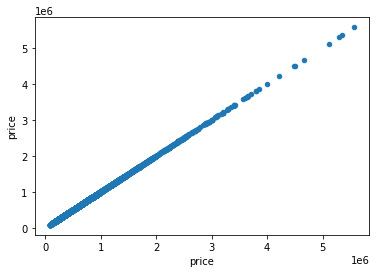

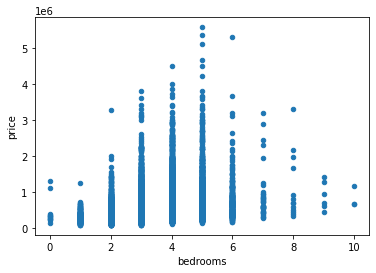

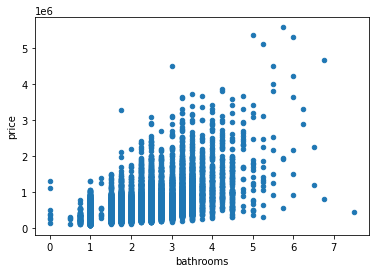

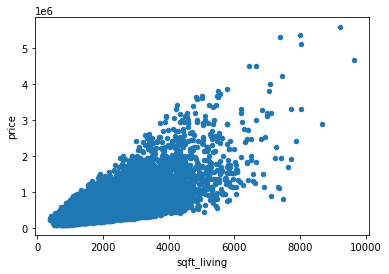

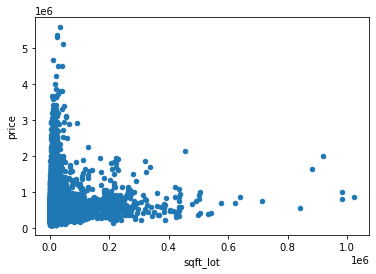

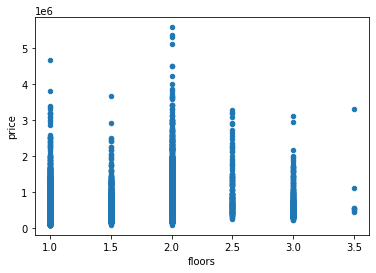

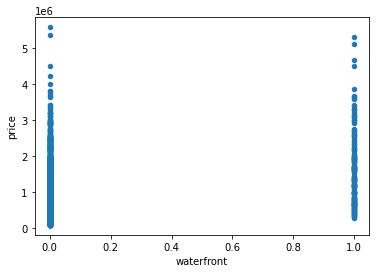

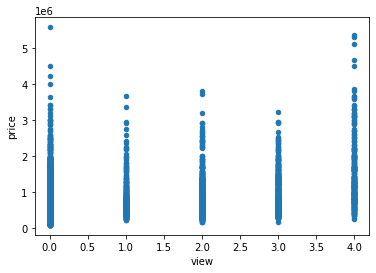

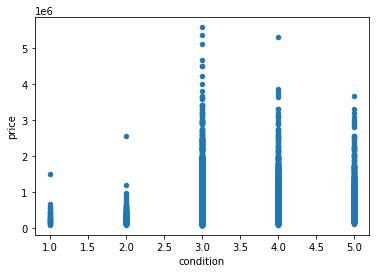

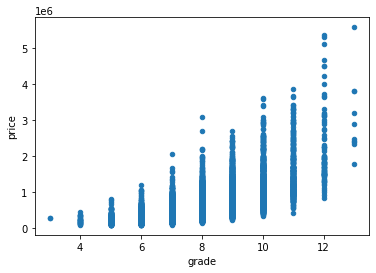

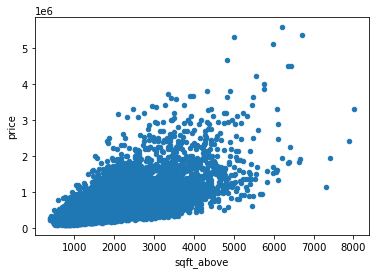

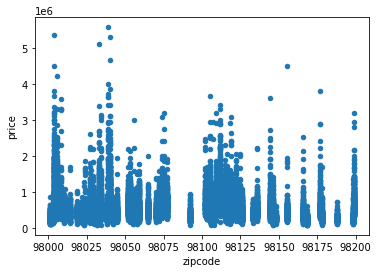

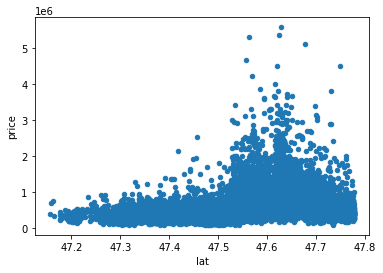

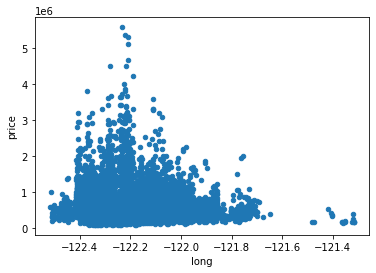

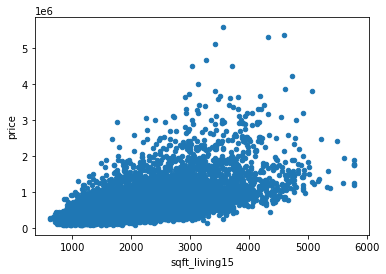

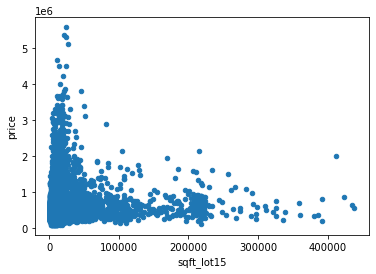

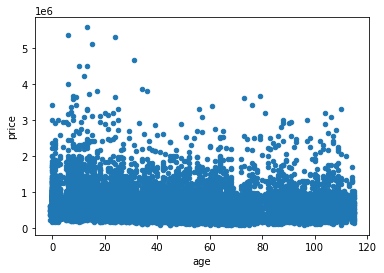

In [20]:
for  feature in (df.columns):
    df.plot(feature, "price", subplots=True, kind="scatter")

In [21]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.315867,0.521588,0.697677,0.094217,0.259120,0.264859,0.396998,0.037502,0.673187,0.599670,-0.052142,0.314000,0.021734,0.590123,0.079193,-0.056105
bedrooms,0.315867,1.000000,0.528025,0.592861,0.032032,0.180082,-0.007600,0.079773,0.024517,0.364375,0.490121,-0.157534,-0.011030,0.135081,0.402463,0.028816,-0.160376
bathrooms,0.521588,0.528025,1.000000,0.752098,0.089958,0.500881,0.062774,0.183102,-0.126459,0.662727,0.681683,-0.204074,0.023773,0.224002,0.567687,0.079683,-0.508972
sqft_living,0.697677,0.592861,0.752098,1.000000,0.181099,0.354344,0.100994,0.280020,-0.059583,0.763568,0.874373,-0.200016,0.051935,0.241815,0.758454,0.178697,-0.322139
sqft_lot,0.094217,0.032032,0.089958,0.181099,1.000000,-0.005715,0.024364,0.070389,-0.009922,0.123213,0.194336,-0.135019,-0.090883,0.240127,0.155645,0.730533,-0.063476
floors,0.259120,0.180082,0.500881,0.354344,-0.005715,1.000000,0.023320,0.028020,-0.264374,0.457995,0.525667,-0.059063,0.049343,0.125787,0.279521,-0.015813,-0.489737
waterfront,0.264859,-0.007600,0.062774,0.100994,0.024364,0.023320,1.000000,0.403135,0.017019,0.081909,0.069317,0.031125,-0.014671,-0.042053,0.085548,0.033213,0.025673
view,0.396998,0.079773,0.183102,0.280020,0.070389,0.028020,0.403135,1.000000,0.046214,0.248962,0.161763,0.086347,0.006831,-0.079763,0.279034,0.064635,0.054019
condition,0.037502,0.024517,-0.126459,-0.059583,-0.009922,-0.264374,0.017019,0.046214,1.000000,-0.146761,-0.159757,0.002843,-0.014938,-0.105887,-0.093144,-0.001975,0.361487
grade,0.673187,0.364375,0.662727,0.763568,0.123213,0.457995,0.081909,0.248962,-0.146761,1.000000,0.755686,-0.184987,0.114020,0.199591,0.713344,0.116616,-0.448214


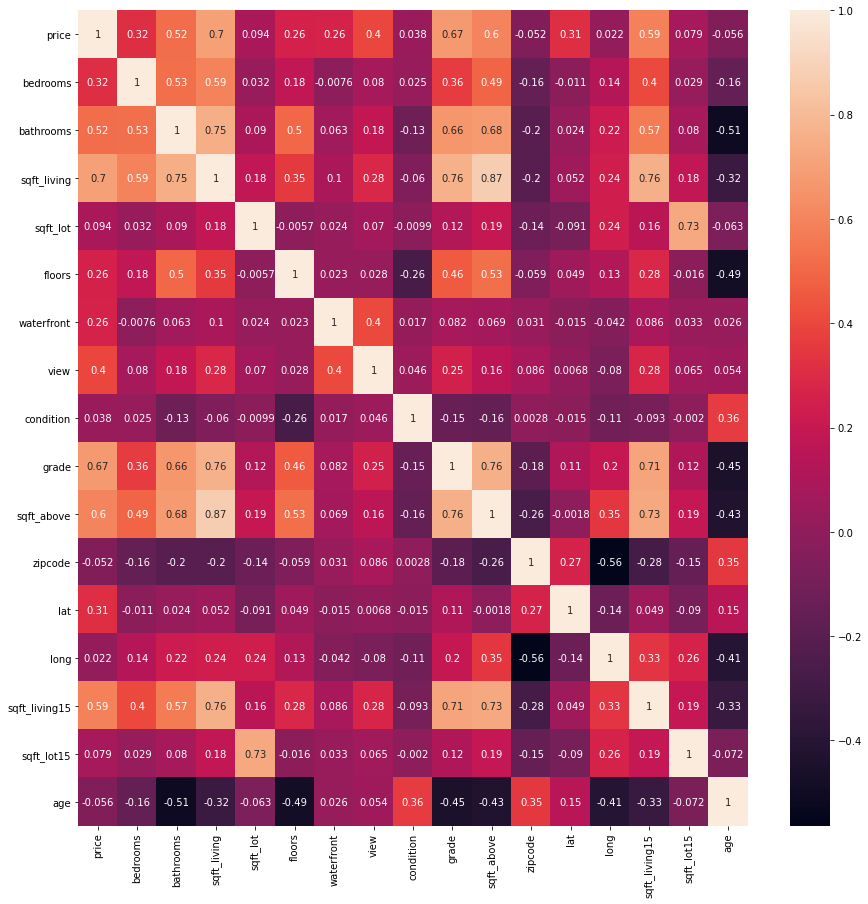

In [22]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [23]:
df_shuffled = shuffle(df, random_state=123)
train = df_shuffled[:int(len(df_shuffled)*0.8)]
test = df_shuffled[len(train):]

In [24]:
train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.726700e+04,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000
mean,5.375203e+05,3.366016,2.110731,2073.739040,14646.019980,1.492819,0.007645,0.232293,3.409104,7.652806,1782.656918,98078.136503,47.559549,-122.213963,1982.006197,12563.750738,43.316789
std,3.554579e+05,0.907668,0.765706,908.386478,35470.911152,0.539884,0.087101,0.764045,0.648001,1.169806,820.607773,53.546268,0.138352,0.141121,682.357610,25057.747099,29.319813
min,8.100000e+04,0.000000,0.000000,384.000000,635.000000,1.000000,0.000000,0.000000,1.000000,3.000000,384.000000,98001.000000,47.155900,-122.515000,620.000000,748.000000,-1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.470250,-122.328000,1480.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1909.000000,7620.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571200,-122.231000,1830.000000,7620.000000,40.000000
75%,6.400000e+05,4.000000,2.500000,2550.000000,10699.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,98118.000000,47.677650,-122.125000,2360.000000,10085.000000,63.000000
max,5.570000e+06,10.000000,6.750000,9640.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,115.000000


In [25]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
13071,2250000.0,3,2.5,3420,8700,1.0,0,0,3,9,2890,98112,47.6352,-122.290,3370,8700,64
2533,865000.0,4,3.0,3690,9892,2.0,0,0,3,10,3690,98075,47.5937,-121.982,3430,11294,16
12530,740000.0,4,2.0,2800,8540,1.0,0,0,4,8,1730,98052,47.6869,-122.126,2470,9400,38
8530,215000.0,4,1.5,1860,5040,1.5,0,0,5,8,1860,98022,47.2077,-121.993,1680,5800,94
10988,299990.0,3,2.5,1870,8541,2.0,0,0,3,8,1870,98023,47.2925,-122.346,2150,7789,25


In [26]:
test.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,4.317000e+03,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000,4317.000000
mean,5.447697e+05,3.381978,2.126245,2094.761640,1.548725e+04,1.499305,0.006949,0.237665,3.412555,7.671531,1803.835071,98077.198517,47.562021,-122.213940,2003.763956,12827.927496,43.266852
std,3.667514e+05,0.893950,0.766436,901.449149,4.436588e+04,0.539882,0.083082,0.766864,0.658979,1.174552,819.975176,53.340837,0.139342,0.139254,686.919961,27329.948468,29.540278
min,9.000000e+04,0.000000,0.500000,390.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,390.000000,98001.000000,47.164700,-122.519000,710.000000,750.000000,-1.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.037000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1210.000000,98033.000000,47.472700,-122.329000,1500.000000,5100.000000,18.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7.560000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,98065.000000,47.576000,-122.228000,1850.000000,7614.000000,39.000000
75%,6.500000e+05,4.000000,2.500000,2550.000000,1.058400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,98117.000000,47.679100,-122.125000,2380.000000,10042.000000,63.000000
max,5.350000e+06,10.000000,7.500000,8670.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,98199.000000,47.777600,-121.364000,5790.000000,434728.000000,115.000000


In [27]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
21269,365000.0,5,2.75,2410,5003,1.0,0,0,3,7,1410,98118,47.5298,-122.274,1590,5003,6
6262,675000.0,3,1.50,2510,3600,2.5,0,0,4,8,2510,98112,47.6195,-122.313,1740,1885,107
1948,215000.0,4,1.50,1430,8775,1.0,0,0,3,7,1030,98023,47.3034,-122.383,1390,7800,35
4449,379500.0,2,1.00,960,5096,1.0,0,0,5,7,960,98126,47.5314,-122.378,1760,4488,65
8252,433000.0,4,2.00,1840,4760,1.5,0,0,4,6,1080,98106,47.5297,-122.349,1170,5950,86


In [28]:
def regression(x_train, y_train, x_test, y_test):
    models = {'LIN': LinearRegression().fit(x_train, y_train), 
              'LASSO': Lasso(alpha = 0.3).fit(x_train, y_train), 
              'RIDGE': Ridge(alpha = 0.01).fit(x_train, y_train), 
              'ELASTICNET': ElasticNet().fit(x_train, y_train)}
    for m in models:
        print(m)
        train_pred = models[m].predict(x_train)
        test_pred = models[m].predict(x_test)
        print('Coef: ', models[m].intercept_, models[m].coef_)
        print('--train--')
        print ('Score: ', r2_score(y_train, train_pred))
        print('MSE: ', np.sqrt(mean_squared_error(y_train,train_pred)))
        print('--test--')
        print ('Score: ', r2_score(y_test, test_pred))
        print('MSE: ', np.sqrt(mean_squared_error(y_test,test_pred)))
        print() 
        print()
        #sns.jointplot(x=y_test, y=test_pred, kind='reg', line_kws={"color": "red"})

In [29]:
def scale_data(x_train, y_train, x_test, y_test):
    x_train = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
    x_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))
    y_train = (y_train - y_train.min(axis=0)) / (y_train.max(axis=0) - y_train.min(axis=0))
    y_test = (y_test - y_test.min(axis=0)) / (y_test.max(axis=0) - y_test.min(axis=0))
    return x_train, y_train, x_test, y_test

In [30]:
x_train = np.array(train['grade']).reshape((-1, 1))
y_train = np.array(train['price'])
x_test = np.array(test['grade']).reshape((-1, 1))
y_test = np.array(test['price'])
mm=MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)
#x_train, y_train, x_test, y_test = scale_data(x_train, y_train, x_test, y_test)

regression(x_train, y_train, x_test, y_test)

LIN
Coef:  -414927.18037823716 [2047038.87099714]
--train--
Score:  0.4538405336674427
MSE:  262685.0039334047
--test--
Score:  0.4504607951634031
MSE:  271844.6310557601


LASSO
Coef:  -414916.9795837895 [2047016.94703427]
--train--
Score:  0.45384053361538446
MSE:  262685.0039459239
--test--
Score:  0.4504605706775179
MSE:  271844.6865798027


RIDGE
Coef:  -414886.8712356412 [2046952.23694621]
--train--
Score:  0.45384053285455916
MSE:  262685.00412889
--test--
Score:  0.45045990751681186
MSE:  271844.85060503025


ELASTICNET
Coef:  512149.1545285245 [54528.65506049]
--train--
Score:  0.023856612592408677
MSE:  351182.0876429406
--test--
Score:  0.022765349132774393
MSE:  362510.715532492




In [31]:
features = ['grade', 'sqft_living', 'sqft_living15']
x_train = np.array(train[features])
y_train = np.array(train['price'])
x_test = np.array(test[features])
y_test = np.array(test['price'])

mm=MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

#x_train, y_train, x_test, y_test = scale_data(x_train, y_train, x_test, y_test)
regression(x_train, y_train, x_test, y_test)

LIN
Coef:  -227587.65364280494 [ 987844.58157584 1516010.62251587  109040.45944074]
--train--
Score:  0.5348943767974865
MSE:  242410.45293232414
--test--
Score:  0.5338008108004049
MSE:  250384.34783241097


LASSO
Coef:  -227581.6577050311 [ 987843.36703892 1515978.27001074  109042.26365271]
--train--
Score:  0.5348943767211018
MSE:  242410.4529522298
--test--
Score:  0.5338003987590383
MSE:  250384.45848112984


RIDGE
Coef:  -227579.4997236603 [ 987843.82214748 1515804.78755521  109153.48473337]
--train--
Score:  0.534894375420407
MSE:  242410.4532911872
--test--
Score:  0.5337998054057258
MSE:  250384.61781889005


ELASTICNET
Coef:  491092.33075582143 [52643.39277571 45850.68311384 51485.97726855]
--train--
Score:  0.06155696517857001
MSE:  344333.6812049188
--test--
Score:  0.059461492805373495
MSE:  355639.26996415365




In [32]:
models = [('lasso', Lasso()),
        ('ridge', Ridge()),
        ('easticNet',ElasticNet())]
m = StackingRegressor(estimators = models)
m_new = m.fit(x_train, y_train)
pred = m.predict(x_test)
print('train r^2: ', m_new.score(x_train, y_train))
print('test r^2: ', m_new.score(x_test, y_test))

train r^2:  0.4946575538170026
test r^2:  0.505502936261746
